## Table of Contents
* [Likelihood](#likelihood)
* [Maximum Likelihood Estimation](#maximum-likelihood-estimation)
* [Cross-entropy Loss](#cross-entropy-loss)

### Likelihood
Likelihood is a concept in statistics that refers to the probability of observing a given set of data under a particular statistical model with specific parameters. It's a measure used to estimate or infer the best parameters of a statistical model, and it plays a central role in maximum likelihood estimation (MLE), a widely used technique for parameter estimation.

**Formal Definition:**
Let's represent a random variable as X, and its possible outcomes as x.
We have a statistical model with unknown parameters denoted by a vector θ.
The likelihood function, denoted by L(θ | x), represents the probability of observing the specific outcome x given the parameter values θ.

$$L(\theta|x_1, x_2, ..., x_n) = P(x_1, x_2, ..., x_n|\theta)$$
Here, $L(\theta|data)$ is the likelihood function, which indicates how "likely" the observed data is for a given set of parameters θ.

**1. Likelihood Function Basics:**
For a model predicting class probabilities, the output for an input $ x $ is a discrete probability distribution across all possible classes $ C $. This is often represented as:
$$ \hat{y} = [p_1, p_2, \dots, p_C] $$
where:
- $ p_i $ is the predicted probability of class $ i $,
- $ \sum_{i=1}^C p_i = 1 $ (probabilities sum to 1).

If the true label is $ y $, the likelihood of the prediction for $ x $ being correct is equal to the predicted probability of the correct class $ p_y $.

**2. One-Hot Encoding of Ground Truth:**
In many classification problems, ground truth labels are represented in a **one-hot encoded format**. For example, if there are three classes and the true label is $ y = 2 $, then:
$$
\text{Ground truth label} = [0, 1, 0]
$$
This means that the second class is the correct class.

If the model predicts $ \hat{y} = [p_1, p_2, p_3] $, the likelihood is the predicted probability of the correct class, $ p_y $. Using the one-hot encoding, we can compute this as:
$$
\text{Likelihood} = \prod_{i=1}^C p_i^{y_i}
$$
Where:
- $ y_i $ is 1 only for the correct class and 0 otherwise.

Effectively, this formula picks out $ p_y $ (the predicted probability of the correct class), as all other terms $ p_i^{y_i} $ become 1 (since $ p_i^0 = 1 $).

**3. Why Multiply Probabilities:**
If we have a dataset with $ N $ independent examples, the total likelihood is the product of the likelihoods of each individual example. For example:
$$
\mathcal{L} = \prod_{n=1}^N \prod_{i=1}^C p_{i,n}^{y_{i,n}}
$$
Where:
- $ p_{i,n} $ is the predicted probability of class $ i $ for example $ n $,
- $ y_{i,n} $ is the one-hot encoded label for example $ n $.

This multiplication comes from the **independence assumption**: the likelihood of observing all examples is the product of their individual probabilities.

**4. Why Raise to the Power of Ground Truth Labels**
The use of $ p_i^{y_i} $ simplifies selecting the correct class probability in a mathematical way. This is because:
- For the correct class, $ y_i = 1 $, so $ p_i^{y_i} = p_i $, contributing the predicted probability for that class.
- For all other classes, $ y_i = 0 $, so $ p_i^{y_i} = 1 $, effectively ignoring these classes.

This avoids explicitly writing out conditional statements or loops to select the correct probability.


*Key Points about Likelihood:*

**Function of Parameters:** Likelihood is a function of the parameters θ, not the outcome x. It tells us how well different parameter values fit the observed data.
Not a Probability Density: Unlike probability, the likelihood function's integral or sum (depending on discrete or continuous data) over all possible parameter values is not necessarily equal to 1.
Relative Comparison: Likelihood provides a relative ranking of parameter values. A higher likelihood indicates a better fit for the observed data.

$$L(\Theta|x_1, x_2, ..., x_n) = P(x_1, x_2, ..., x_n|\Theta)$$

**Log-Likelihood:** Working with likelihood directly can be mathematically challenging, especially when dealing with large products or complex expressions. A common approach is to use the logarithm of the likelihood, known as the log-likelihood. Taking the logarithm simplifies calculations and makes it easier to perform optimization. The log-likelihood is defined as:
$$\ell(\theta|x_1, x_2, ..., x_n) = \log L(\theta|x_1, x_2, ..., x_n)$$
Negative Log-Likelihood
Negative log-likelihood is simply the negative of the log-likelihood:
$$NLL(\theta|x_1, x_2, ..., x_n) = -\ell(\theta|x_1, x_2, ..., x_n)$$
The NLL represents how "unlikely" the observed data is given a set of parameters θ. In the context of optimization, the goal is typically to minimize the NLL, thereby finding the parameters that make the data most likely, which corresponds to maximizing the likelihood.

#### Maximum Likelihood Estimation

MLE is a method used to estimate the parameters of a statistical model based on observed data.
It aims to find the parameter values that maximize the likelihood function, which measures how well the model explains the observed data.
In classification problems, MLE seeks the best parameters (often denoted as θ) that fit the joint probability distribution of the observed data.
The likelihood function is calculated by multiplying the discrete probability distribution over the classes, raised to the probability of the ground truth (one-hot encoded) labels.

**The Likelihood Function:**

The likelihood function, denoted by L(θ | x_1, x_2, ..., x_n), represents the probability of observing the entire dataset given the parameters θ.
Since the samples are i.i.d., we can express the likelihood function as the product of the individual probabilities of each sample:

$$L(\theta|x_1, x_2, ..., x_n) = \prod_{i=1}^n P(x_i|\theta)$$
The likelihood function is calculated by multiplying the discrete probability distribution over the classes, raised to the probability of the ground truth (one-hot encoded) labels.
In a multi-class classification scenario where C is the number of classes and y1...yC are the one-hot encoded ground truth labels and p1...pC are the probabilities of each class, we have likelihood as:
$$L = \prod_{c=1}^C p_c^{y_c}$$

**The Maximization:**

MLE aims to find the value of θ that maximizes the likelihood function. In practice, maximizing the product of terms in the likelihood function can be cumbersome.
Therefore, we often work with the log-likelihood function, which is the logarithm of the likelihood function.
Maximizing the log likelihood is equivalent to minimizing the negative log likelihood (NLL)
To find MLE we differentiate the NLL function with respect to θ and set the derivative equal to 0.

Depending on the complexity of the model and the form of the probability distribution, solving the derivative of the log-likelihood function might require advanced mathematical techniques. Numerical optimization algorithms are often used to find the MLE in such cases.

---

### **Cross-entropy Loss**
Entropy is a measure of the uncertainty or randomness in a probability distribution. In the context of information theory, it quantifies the expected "surprise" or information content from a random variable. Given a discrete probability distribution $P = {p_1, p_2, ..., p_n}$, where $p_i$ is the probability of the ith outcome, the entropy $H(P)$ is defined as:
$$H(P) = -\sum_{i=1}^n p_i \log p_i$$
Entropy represents the minimum number of bits needed, on average, to encode information from the distribution P. If all outcomes are equally likely, the entropy is maximized, indicating greater uncertainty.

**Cross-Entropy:**

Cross-entropy is a measure of the dissimilarity between two probability distributions. Given two distributions $P = {p_1, p_2, ..., p_n}$ and $Q = {q_1, q_2, ..., q_n}$, the cross-entropy between them, $H(P,Q)$, is defined as:
$$H(P,Q) = -\sum_{i=1}^n p_i \log q_i$$
Cross-entropy quantifies the expected number of bits needed to encode information from distribution P using distribution Q. If Q is different from P, it takes more bits to encode the information, indicating dissimilarity between the distributions.

**Connection to Cross-Entropy Loss**

In the context of machine learning, cross-entropy loss is commonly used for training models with probabilistic outputs. Consider a supervised learning scenario with C classes, where the true labels are represented by a one-hot encoded distribution $y = {y_1, y_2, ..., y_C}$ and the model's predicted probabilities are $p = {p_1, p_2, ..., p_C}$. The cross-entropy loss measures the dissimilarity between the true and predicted distributions:
$$H(y,p) = -\sum_{c=1}^C y_c \log p_c$$

**Interpretation**

If the predicted probabilities perfectly match the one-hot encoded true labels, the cross-entropy loss is minimized, indicating a good fit.
If the predicted probabilities differ from the true labels, the cross-entropy loss is higher, indicating a poor fit.
Intuitively, cross-entropy measures the average bits of information required to identify an event drawn from the estimated probability distribution, compared to the true distribution.

Connection between Cross-Entropy and MLE:

The cross-entropy loss function is mathematically equivalent to the negative log-likelihood.
Specifically, if we consider a single data point (N = 1), minimizing the cross-entropy loss corresponds to maximizing the likelihood when hard labels (ground truth) are provided.

$$\begin{aligned}
-\log L(\theta) &= -\log \prod_{c=1}^C p_c^{y_c} \
&= -\sum_{c=1}^C y_c \log p_c \
&= H(y,p)
\end{aligned}$$
In summary, both cross-entropy loss and MLE aim to find optimal parameters for a model by considering the likelihood of observed data. While MLE directly maximizes the likelihood, cross-entropy loss indirectly achieves this goal by minimizing the negative log-likelihood during training.

---

### Understanding Kullback-Leibler Divergence and Cross Entropy <a id="cross_entropy"></a>

#### Kullback-Leibler Divergence

Kullback-Leibler (KL) divergence is a measure of how one probability distribution diverges from a second, expected probability distribution. It is often used in information theory, statistics, and machine learning to quantify the difference between two probability distributions.

**Mathematical Definition**

Given two probability distributions $P$ (true distribution) and $Q$ (approximate distribution), the KL divergence from $Q$ to $P$ is defined as:

$$
D_{KL}(P \parallel Q) = \sum_{x \in \mathcal{X}} P(x) \log \frac{P(x)}{Q(x)}
$$

For continuous distributions, the sum is replaced by an integral:

$$
D_{KL}(P \parallel Q) = \int_{-\infty}^{\infty} p(x) \log \frac{p(x)}{q(x)} \, dx
$$

Here:
- $P(x)$ and $Q(x)$ are the probability mass functions (for discrete distributions) or probability density functions (for continuous distributions).
- $\mathcal{X}$ is the set of all possible events.

**Interpretation**

- $D_{KL}(P \parallel Q)$ measures the amount of information lost when $Q$ is used to approximate $P$.
- It is not symmetric: $D_{KL}(P \parallel Q) \neq D_{KL}(Q \parallel P)$.

**Cross Entropy**

Cross entropy is a measure of the difference between two probability distributions for a given set of events. It quantifies the average number of bits needed to identify an event from a set of possibilities if a coding scheme is used based on a given probability distribution $Q$, rather than the true distribution $P$.

**Mathematical Definition**

For discrete distributions $P$ and $Q$, the cross entropy is defined as:

$$
H(P, Q) = -\sum_{x \in \mathcal{X}} P(x) \log Q(x)
$$

For continuous distributions:

$$
H(P, Q) = -\int_{-\infty}^{\infty} p(x) \log q(x) \, dx
$$

#### Relationship Between KL Divergence and Cross Entropy

The KL divergence can be expressed in terms of entropy and cross entropy. The entropy $H(P)$ of a distribution $P$ is given by:

$$
H(P) = -\sum_{x \in \mathcal{X}} P(x) \log P(x)
$$

For continuous distributions:

$$
H(P) = -\int_{-\infty}^{\infty} p(x) \log p(x) \, dx
$$

The cross entropy $H(P, Q)$ can be decomposed as:

$$
H(P, Q) = H(P) + D_{KL}(P \parallel Q)
$$

Thus, the KL divergence can be interpreted as the difference between the cross entropy and the entropy of $P$:

$$
D_{KL}(P \parallel Q) = H(P, Q) - H(P)
$$

This equation highlights that KL divergence measures the extra amount of information (in bits) required to encode the distribution $P$ using the distribution $Q$ compared to using the optimal code based on $P$.

**Example in Context**

Suppose you have a true probability distribution $P$ and you are using an approximate distribution $Q$. If you calculate the cross entropy $H(P, Q)$, it will tell you how many bits on average you need to encode samples from $P$ using the distribution $Q$.

The entropy $H(P)$ tells you how many bits are needed if you use the true distribution $P$.

The KL divergence $D_{KL}(P \parallel Q)$ then gives you the inefficiency introduced by using $Q$ instead of $P$. It essentially quantifies how much more difficult it is to represent the true distribution $P$ using the approximate distribution $Q$.

**Visual Representation**

To illustrate, consider the following:

- $P$ is the true distribution of data.
- $Q$ is a model's predicted distribution.

When you use $Q$ to approximate $P$, the KL divergence provides a way to measure how "wrong" $Q$ is. The lower the KL divergence, the closer $Q$ is to $P$.

**Summary**

- **KL Divergence** measures the difference between two probability distributions.
- **Cross Entropy** measures the average number of bits needed to encode data from a true distribution using an approximate distribution.
- **Relation**: KL divergence is the difference between the cross entropy and the entropy of the true distribution. It provides a measure of inefficiency when using an approximate distribution instead of the true distribution.

**When to use KL divergence**

- KL divergence is used when we want to measure how much one probability distribution differs from another. Used in Variational Autoencoders (VAEs) to regularize the latent space.
- For Reinforcement Learning (Policy Optimization). Used in policy gradient methods (e.g., PPO, TRPO) to measure how much the new policy deviates from the old policy.

---

### **AUC** <a id="auc"></a>

AUC stands for **Area Under the Curve**. It refers to the area under the Receiver Operating Characteristic (ROC) curve, a graphical representation of the true positive rate (TPR) versus the false positive rate (FPR) at various threshold settings. The AUC metric measures the ability of a classifier to distinguish between classes. Specifically:

- **True Positive Rate (TPR)** or **Recall** or **Sensitivity**: The ratio of correctly predicted positive observations to all actual positives.
  
  $$
  \text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}
  $$

- **False Positive Rate (FPR)**: The ratio of incorrectly predicted positive observations to all actual negatives.
  
  $$
  \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
  $$

- **Specificity**: Specificity measures the proportion of actual negative instances that are correctly identified by the model as negative. It represents the ability of the model to correctly identify negative instances

  $$
  \text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}} = 1 - \text{FPR}
  $$

  #### Understanding the ROC Curve

- The **ROC curve** plots TPR (on the y-axis) against FPR (on the x-axis) for different classification thresholds. Each point on the curve represents a TPR/FPR pair corresponding to a particular threshold.

- The **AUC** is the area under this curve. AUC can range from 0 to 1:
  - **AUC = 1**: Perfect model, perfectly distinguishes between positive and negative classes.
  - **AUC = 0.5**: Model has no discrimination capability (equivalent to random guessing).
  - **AUC < 0.5**: Model is worse than random guessing (indicating it might be consistently predicting the opposite class).

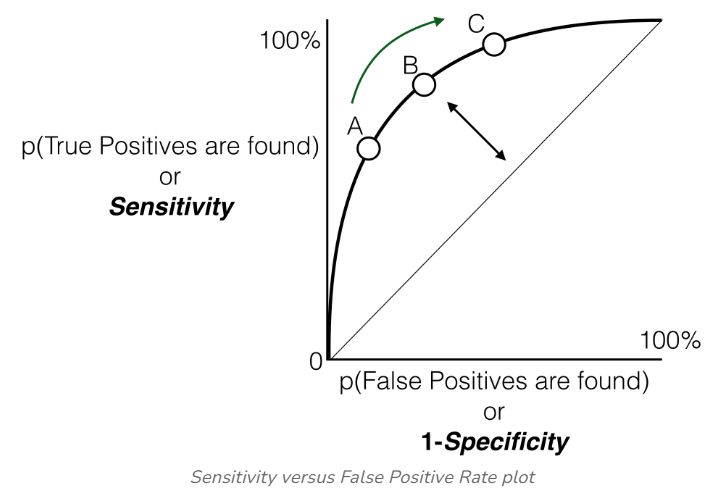

#### Sensitivity and Specificity:

- **Inverse Relationship:** Sensitivity and specificity have an inverse relationship. When one increases, the other tends to decrease. This reflects the inherent trade-off between true positive and true negative rates.
- **Tuning via Threshold:** By adjusting the threshold value, we can control the balance between sensitivity and specificity. Lower thresholds lead to higher sensitivity (more true positives) at the expense of specificity (more false positives). Conversely, raising the threshold boosts specificity (fewer false positives) but sacrifices sensitivity (more false negatives).
- FPR and Specificity Connection: False Positive Rate (FPR) is simply the complement of specificity (FPR = 1 – specificity). This signifies the direct relationship between them: higher specificity translates to lower FPR, and vice versa.
- FPR Changes with TPR: Similarly, as you observed, the True Positive Rate (TPR) and FPR are also linked. An increase in TPR (more true positives) generally leads to a rise in FPR (more false positives). Conversely, a drop in TPR (fewer true positives) results in a decline in FPR (fewer false positives)

**What AUC actually means**
An AUC of 0.75 would actually mean that let’s say we take two data points belonging to separate classes then there is a 75% chance the model would be able to segregate them or rank order them correctly i.e positive point has a higher prediction probability than the negative class. (assuming a higher prediction probability means the point would ideally belong to the positive class).

| Index | Class | Probability |
|-------|-------|-------------|
| P1    | 1     | 0.95        |
| P2    | 1     | 0.90        |
| P3    | 0     | 0.85        |
| P4    | 0     | 0.81        |
| P5    | 1     | 0.78        |
| P6    | 0     | 0.70        |

Here we have 6 points where P1, P2, and P5 belong to class 1 and P3, P4, and P6 belong to class 0 and we’re corresponding predicted probabilities in the Probability column, as we said if we take two points belonging to separate classes then what is the probability that model rank orders them correctly.

We will take all possible pairs such that one point belongs to class 1 and the other belongs to class 0, we will have a total of 9 such pairs below are all of these 9 possible pairs.

| Pair   | isCorrect |
|--------|-----------|
| (P1,P3) | True      |
| (P1,P4) | True      |
| (P1,P6) | True      |
| (P2,P3) | True      |
| (P2,P4) | True      |
| (P2,P6) | True      |
| (P5,P3) | False     |
| (P5,P4) | False     |
| (P5,P6) | True      |

Here column is Correct tells if the mentioned pair is correctly rank-ordered based on the predicted probability i.e class 1 point has a higher probability than class 0 point, in 7 out of these 9 possible pairs class 1 is ranked higher than class 0, or we can say that there is a 77% chance that if you pick a pair of points belonging to separate classes the model would be able to distinguish them correctly. 

---

### MSE as a loss function <a id="mse"></a>

Mean Squared Error (MSE) and its implicit assumption of Gaussian noise is rooted in probability theory and statistical inference. When we use MSE as a loss function, we're essentially making a maximum likelihood estimation under certain assumptions. 

Let's say we have a true value y and a prediction ŷ. The difference (y - ŷ) represents the error or noise.
If we assume this error follows a Gaussian distribution with mean 0 and variance σ², the probability density function is:

P(y|ŷ) = (1 / √(2πσ²)) * exp(-(y - ŷ)² / (2σ²))

To find the most likely prediction ŷ, we maximize this probability (or minimize its negative log):

-log P(y|ŷ) ∝ (y - ŷ)² / (2σ²)

Minimizing this is equivalent to minimizing (y - ŷ)², which is precisely what MSE does.

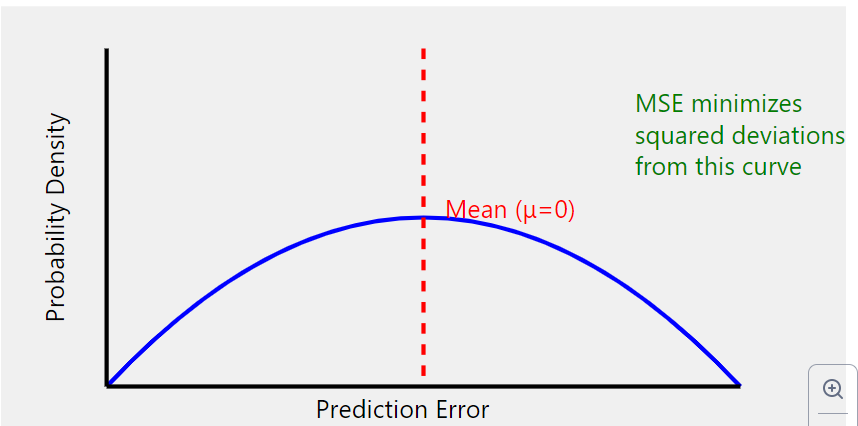

**Implications:**
When we use MSE, we're implicitly treating deviations from the prediction as if they come from this Gaussian distribution.
Large errors are penalized more heavily (quadratically) because they're less likely under a Gaussian assumption.
This assumption works well for many natural phenomena due to the Central Limit Theorem, which is why MSE is widely applicable.

**Contrast with Other Loss Functions:**
Mean Absolute Error (MAE) implicitly assumes a Laplacian distribution of errors.
Binary Cross-Entropy (BCE) is appropriate when assuming errors follow a Bernoulli distribution.

**Practical Considerations:**
If your data's noise truly follows a Gaussian distribution, MSE is the optimal choice (in terms of maximum likelihood estimation).
If your data has outliers or heavy-tailed noise distributions, MSE might not be the best choice, as it's sensitive to outliers.
In deep learning, the choice of loss function can affect not just the final performance but also the learning dynamics and convergence speed.

**Connection to Least Squares:**
The principle of least squares, which minimizes the sum of squared residuals, is equivalent to maximizing the likelihood under Gaussian noise assumptions.
This connects MSE to a wide range of statistical techniques based on least squares.

Understanding this relationship between MSE and Gaussian noise assumptions helps in:

- Choosing appropriate loss functions for different types of data and noise distributions.
- Interpreting model outputs in a probabilistic framework.
- Designing more sophisticated loss functions that might better match the true data distribution.

In the context of Variational Autoencoders (VAEs), using MSE implies an assumption of Gaussian noise in the reconstruction process. While this can work well for many types of data, it might not be optimal for all cases, which is why alternatives like Binary Cross-Entropy are often used, especially for binary or bounded data.

---

### **MSE vs BCE as loss function** <a id="mse-bce"></a>

The question is indeed very interesting one. Let me try to put down what I know

Binary Cross Entropy loss is supposed to be used as a loss function for binary classification tasks when you have only two distinct target labels. It is a specific case of the more general cross entropy loss.
Let K = number of distinct classes (labels), N = number of training samples
$$h_\theta = model (hypothesis) $$  
With one hot encoding of training samples the cross entropy loss can be expressed as

$$ L = -\sum\limits_{i=1}^{N}\sum\limits_{j=1}^{K}y_{ij}\log(h_\theta(x_i)_j) $$

m = number of input features
For ith training sample,  x_i = vector(dimension m)
corresponding model output = vector of dimension K (real valued logits at each index)

Another version of the cross entropy loss takes also into account the scores of classes (other than the ground truth label) giving the other predicted classes a probability of 1−sj , and penalizes them by the log of that amount 
(here, sj denotes the jth score, which is the jth element of hθ(xi)).

$$ (1-y_{ij})\log(1-h_\theta(x_i)_j)$$

Considering j =2 and for a specific ith sample we get the more common binary cross entropy loss formula that is commonly arrived at using maximum likelihood estimation

L = - (y log(h) + (1-y)log(1-h))

Now coming to using binary cross entropy loss for a regression problem. If your target variable is real valued (non binary) between 0 and 1, you can consider using binary cross entropy as the loss function with sigmoid as the activation. In such a scenario y (ground truth) is a real value between 0 and 1 and the predicted value h too is a real value between 0 and 1 (after applying sigmoid on the model logit value) .

For USPPPM case, the score (target variable) is indeed real valued between 0 and 1 ( though it is not really continuous valued but still it fits the definition ), thus your model can output a single logit value for a sample which can be converted to a prediction between 0 and 1 using sigmoid activation. Thus making BCELossWithLogits a reasonable choice of loss function for this problem

Now coming to which one is better, MSE or BCE for a regression problem. It is hard to say, both losses have their own unique properties
 
MSE loss is the natural choice for regression problems. But is it really different from cross entropy. Actually not. If you consider the continuous target variable as a random variable with Gaussian normal distribution, it can be easily shown that MSE is calculating nothing but the cross entropy between random variables (target and predicted)

Consider target value as 0.8 and predicted value as 0.7 and 0.9. MSE loss is symmetric and only cares about how far off the target value your prediction is. Cross entropy loss on the other hand is asymmetric i.e. for the same deviation from the target value in either direction you get two different loss values. Is that a good thing, it actually depends on the problem at hand. 

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F578137%2Ff1762e819666483c7dcdd24c8565dee0%2Fbce_mse.jpg?generation=1656780790028118&alt=media)

There is some opinion that for deep learning models cross entropy loss is more suited as Dropout, BatchNorm etc are more stable with Cross Entropy loss and in general the convergence is also faster. With theoretical background in place, experimenting is the only way to find out which loss works best for which problem.